<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/heat1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solution of 1D Heat Equation (FDM project)**

* We solve a simple example of 1D heat equation given at
  the beginning of the course project booklet.

<IMG src="https://samyzaf.com/fdm/code_heat1d_1.jpg" width=500 align="center"/>

* Note that this is an expert level coding colab notebook!
* Students are not supposed to write code at this level,
  and it is given only for getting an impression on
  how professinal colab notebook looks like.
* So do not worry if you don't understand part of
  the code.

* First we start with loading and importing our
  [fdmtools Python package](https://samyzaf.com/fdmtools.zip).

In [ ]:
%pip install -q https://samyzaf.com/fdmtools.zip
from fdmtools.bsm import *

* Now we can run FDM code.

In [ ]:


L = 1.0                    # Rod Length
T = 0.2                    # Time Length
N = 200                    # Rod division number
Nt = 20000                 # Time division number
dx = L/N                   # Discrete length unit
dt = T/Nt                  # Discrete time unit
gamma = dt/(dx**2)         # convenent constant
U = np.zeros((N+1, Nt+1))  # Numpy array for our FDM grid

print(f"gamma = {gamma}")
if gamma > 0.5:
    print(f"WARNING: gamma >= 0.5! Solution does not satisfy stability condition: gamma<=0.5")
else:
    print(f"Stability gamma = {gamma} < 0.5 (OK)")

# Boundary conditions (the hard way - an easier method will be introduced later)
for k in range(0, Nt+1):
    U[0,k] = exp(-pi**2 * k*dt)     # u(0,t) = e^{-\pi^2 t}
    U[N,k] = -exp(-pi**2 * k*dt)    # u(1,t) = -e^{-\pi^2 t}

for i in range(0, N+1):
    U[i,0] = cos(pi * i*dx)         # u(x,0) = cos (\pi x)

def Solve(U):
  for k in range(0,Nt):
    for i in range(1,N):
      Uxx = (U[i+1,k] - 2*U[i,k] + U[i-1,k]) / (dx**2)
      U[i,k+1] = U[i,k] + Uxx * dt

# We know the exact solution of this pde!
def u(x,t):
    return exp(-pi**2 * t) * cos(pi * x)

Solve(U)
print("Diff. grid U is solved")

gamma = 0.4
Stability gamma = 0.4 < 0.5 (OK)
Diff. grid U is solved


* This is the real solution of the PDE:
  $
  \quad
  u(x,t) = e^{-\pi^2 t} \cos(\pi x)
  $

* Testing our grid solution for the point $(x,t) = (0.37, 0.15)$

In [ ]:
x = 0.37
t = 0.15
i = round(x/dx) ; k = round(t/dt)
print(f"i = {i} ; k = {k}")
print(f"U[{i},{k}] = ".ljust(20) + f"{U[i,k]}".ljust(25)  + "   (the FDM approximation)")
print(f"u({x},{t}) = ".ljust(20) + f"{u(x,t)}".ljust(25)  + "   (the exact solution)")
print(f"Error = {abs(U[i,k] - u(x,t))}")

i = 74 ; k = 15000
U[74,15000] =       0.09036478670643255         (the FDM approximation)
u(0.37,0.15) =      0.09036599830004569         (the exact solution)
Error = 1.2115936131318339e-06


* The next function scans all the values of the grid **U**
  and compares them against the exact solution $u(x,t)$.

* It computes the maximal error over all the grid!

In [ ]:
def compute_max_error():
  E = np.zeros((N+1, Nt+1))
  for i in range(0, N+1):
    x = i/N * L
    for k in range(0,Nt+1):
        t = k/Nt * T
        E[i,k] = abs(u(x,t) - U[i,k])
  max_error = E.max()
  return max_error

print(f"Max error = {compute_max_error()}")

Max error = 3.824227256754575e-06


## **Drawing temperature time frames**
* It's not hard to draw temperature frames at different times.
* The next code draws 20 frames from $t=0.0$ to $t=0.2$.

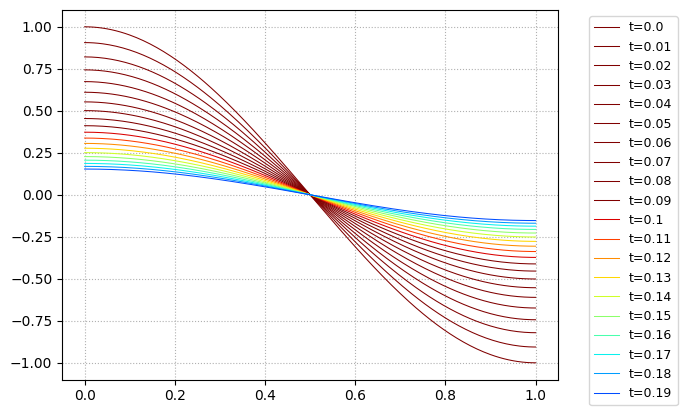

In [ ]:
X = [i*dx for i in range(0,N+1)]
n = 20
R = np.array([j*0.1 for j in range(n)])
colors = cm.jet(0.2+ 0.8*R)[::-1]

for j in range(n):
  k = round(j*Nt/n)
  t = round(j/n * T, 4)
  Temp = [U[i,k] for i in range(0,N+1)]
  plt.plot(X, Temp, color=colors[j], linewidth=0.75, label=f"t={t}")
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=9)
plt.show()